# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bregsi Atingsari Julastri
- **Email:** bregsiaju
- **ID Dicoding:** bregsiaju

## Menentukan Pertanyaan Bisnis

- Faktor apa yang paling mempengaruhi jumlah penyewaan sepeda?
- Bagaimana pola penyewaan sepeda pada musim yang berbeda?
- Bagaimana perilaku penyewaan berbeda antara pengguna kasual dan terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Data Wrangling

### Gathering Data

In [2]:
# Bike-sharing data aggregated on hourly basis
hourly_df = pd.read_csv('./data/hour.csv')
hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Bike-sharing data aggregated on daily basis
daily_df = pd.read_csv('./data/day.csv')
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset yang digunakan berasal dari sistem Capital Bikeshare di Washington D.C. dengan periode data tahun 2011 dan 2012.
- Tahap gathering data bertujuan untuk mengimport dataset yang akan dianalisis. Tahap ini menggunakan bantuan function read_csv dari library pandas.

### Assessing Data

#### Menilai Tabel `hourly_df`

In [4]:
# Melihat struktur baris dan kolom dari tabel hourly_df
hourly_df.shape

(17379, 17)

In [5]:
# melihat tipe data setiap kolom
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# menampilkan ringkasan statistik
hourly_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# mengecek missing value
print('Jumlah Missing Value: ', hourly_df.isna().sum())

Jumlah Missing Value:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
print('Jumlah duplikasi: ', hourly_df.duplicated().sum())

Jumlah duplikasi:  0


##### Validasi Nilai Unik di Kolom Kategori dan Mengecek Konsistensi Data

In [9]:
# Harus terdapat 4 musim
hourly_df['season'].unique()

array([1, 2, 3, 4])

In [10]:
# year (0: 2011, 1:2012)
hourly_df['yr'].unique()

array([0, 1])

In [11]:
# harus dalam rentang 1-12 yang mewakili bulan dalam tahun
hourly_df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [12]:
# harus dalam rentang 0-23 yang mewakili jam dalam satu hari
hourly_df['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [13]:
# 0: hari kerja, 1: hari libur
hourly_df['holiday'].unique()

array([0, 1])

In [14]:
# harus dalam rentang 0-6 yang mewakili hari dalam seminggu
hourly_df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [15]:
# 0: weekend/libur, 1: hari kerja
hourly_df['workingday'].unique()

array([0, 1])

In [16]:
# harus dalam rentang 1-4 (sesuai dokumentasi yang disertakan)
hourly_df['weathersit'].unique()

array([1, 2, 3, 4])

#### Menilai table `daily_df`

In [17]:
# Melihat struktur baris dan kolom dari tabel daily_df
daily_df.shape

(731, 16)

In [18]:
# melihat tipe data setiap kolom
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [19]:
# menampilkan ringkasan statistik
daily_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
# mengecek missing value
print('Jumlah Missing Value: ', daily_df.isna().sum())

Jumlah Missing Value:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [21]:
print('Jumlah duplikasi: ', daily_df.duplicated().sum())

Jumlah duplikasi:  0


##### Validasi Nilai Unik di Kolom Kategori dan Mengecek Konsistensi Data

In [22]:
# Harus terdapat 4 musim
daily_df['season'].unique()

array([1, 2, 3, 4])

In [23]:
# year (0: 2011, 1:2012)
daily_df['yr'].unique()

array([0, 1])

In [24]:
# harus dalam rentang 1-12 yang mewakili bulan dalam tahun
daily_df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [25]:
# 0: hari kerja, 1: hari libur
daily_df['holiday'].unique()

array([0, 1])

In [26]:
# harus dalam rentang 0-6 yang mewakili hari dalam seminggu
daily_df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [27]:
# 0: weekend/libur, 1: hari kerja
daily_df['workingday'].unique()

array([0, 1])

In [28]:
# harus dalam rentang 1-4 (sesuai dokumentasi yang disertakan)
daily_df['weathersit'].unique()

array([2, 1, 3])

**Insight:**
- Kedua tabel dataset, baik daily_df, maupun hourly_df sudah cukup bersih karena tidak memiliki missing value dan duplikasi data.
- Konsistensi data pada setiap kolom juga aman. Tidak ada nilai yang inkonsisten.
- Namun, terdapat sedikit masalah pada tipe data untuk kolom `dteday` yang seharusnya bertipe date, tetapi saat ini masih `object` dan harus diperbaiki.

### Cleaning Data

#### Membersihkan tabel `hourly_df`
- Mengubah tipe data kolom dteday menjadi date
- Mengembalikan nilai asli dari year (yr), month (mnth), dan weekday agar mudah dibaca dan dianalisis
- Mengembalikan nilai-nilai yang dinormalisasi ke skala aslinya agar lebih mudah diinterpretasi dan dibandingkan dengan satuan umum.

In [29]:
# Mengubah tipe data
hourly_df["dteday"] = pd.to_datetime(hourly_df["dteday"])

In [30]:
# Mengembalikan nilai asli tahun
hourly_df['yr'] = hourly_df['yr'].map({0: 2011, 1: 2012})

**De-normalisasi**
> nilai asli = nilai ter-normalisasi × nilai maksimum

In [34]:
hourly_df['temp'] = hourly_df['temp'] * 41  # Mengembalikan suhu ke Celsius
hourly_df['atemp'] = hourly_df['atemp'] * 50  # Mengembalikan suhu terasa ke Celsius
hourly_df['hum'] = hourly_df['hum'] * 100  # Mengembalikan kelembaban ke %
hourly_df['windspeed'] = hourly_df['windspeed'] * 67  # Mengembalikan kecepatan angin ke skala aslinya

In [35]:
hourly_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6800,6801,2011-10-15,4,2011,10,22,0,6,0,1,20.50,24.240,36.0,8.9981,45,121,166
11527,11528,2012-04-30,2,2012,4,12,0,1,1,2,18.04,21.970,47.0,8.9981,45,180,225
2785,2786,2011-04-30,2,2011,4,23,0,6,0,1,18.04,21.970,67.0,7.0015,34,91,125
17142,17143,2012-12-22,1,2012,12,1,0,6,0,1,10.66,10.605,44.0,30.0026,1,34,35
7830,7831,2011-11-27,4,2011,11,21,0,0,0,1,19.68,23.485,67.0,19.0012,13,75,88


In [36]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [37]:
hourly_df.drop('dteday', axis=1).describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,4.000000,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


#### Membersihkan tabel `daily_df`
- Mengubah tipe data kolom dteday menjadi date
- Mengembalikan nilai asli dari year (yr), month (mnth), dan weekday agar mudah dibaca dan dianalisis
- Mengembalikan nilai-nilai yang dinormalisasi ke skala aslinya agar lebih mudah diinterpretasi dan dibandingkan dengan satuan umum.

In [38]:
# Mengubah tipe data
daily_df["dteday"] = pd.to_datetime(daily_df["dteday"])

In [39]:
# Mengembalikan nilai asli tahun
daily_df['yr'] = daily_df['yr'].map({0: 2011, 1: 2012})

**De-normalisasi**
> nilai asli = nilai ter-normalisasi × nilai maksimum

In [41]:
daily_df['temp'] = daily_df['temp'] * 41  # Mengembalikan suhu ke Celsius
daily_df['atemp'] = daily_df['atemp'] * 50  # Mengembalikan suhu terasa ke Celsius
daily_df['hum'] = daily_df['hum'] * 100  # Mengembalikan kelembaban ke %
daily_df['windspeed'] = daily_df['windspeed'] * 67  # Mengembalikan kecepatan angin ke skala aslinya

In [42]:
daily_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
377,378,2012-01-13,1,2012,1,0,5,1,1,11.240847,12.46810,50.7500,25.333236,174,3040,3214
569,570,2012-07-23,3,2012,7,0,1,1,1,30.408347,34.50085,69.4167,9.291761,1135,5831,6966
420,421,2012-02-25,1,2012,2,0,6,0,1,11.924153,12.78375,39.5833,28.250014,317,2415,2732
472,473,2012-04-17,2,2012,4,0,2,1,1,24.941653,29.92435,39.0417,18.333143,989,5702,6691
659,660,2012-10-21,4,2012,10,0,0,0,1,19.030847,22.82145,51.0000,11.125618,2132,4692,6824


In [43]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [44]:
daily_df.drop('dteday', axis=1).describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Insight:**
- Semua data berhasil diimpor tanpa missing values atau duplikasi.
Struktur dataset sudah sesuai dengan kebutuhan analisis.
- Kolom kategori (yr, mnth, weekday) telah dikonversi ke format yang lebih deskriptif.
- Kolom temp, atemp, hum, windspeed telah dikembalikan ke nilai aslinya agar lebih mudah dipahami.
- Tidak ditemukan nilai aneh seperti jumlah penyewaan negatif atau suhu ekstrem di luar batas wajar.
- Semua variabel kategori memiliki nilai yang valid.

**Kesimpulan**: Data telah dibersihkan dan disiapkan untuk tahap Exploratory Data Analysis (EDA).

## Exploratory Data Analysis (EDA)

### Explore `daily_df`

### Memeriksa Distribusi Data
Cek distribusi jumlah penyewaan sepeda (cnt, casual, registered)

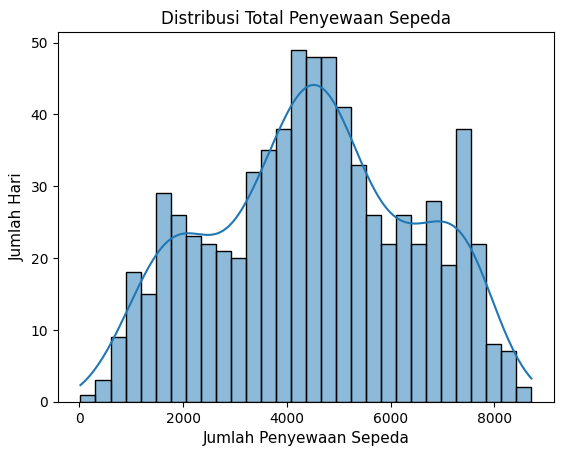

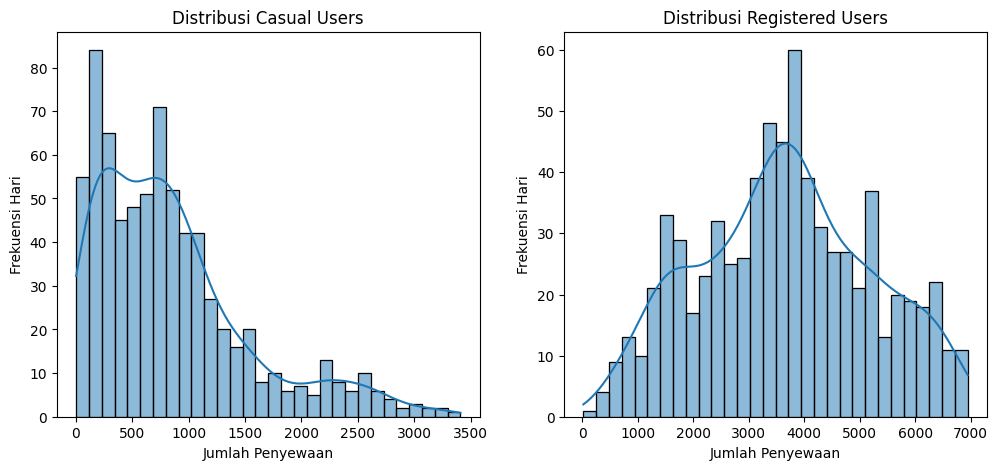

In [45]:
# Distribusi total penyewaan
sns.histplot(daily_df['cnt'], bins=30, kde=True)
plt.xlabel("Jumlah Penyewaan Sepeda", fontsize=11)
plt.ylabel("Jumlah Hari", fontsize=11)
plt.title('Distribusi Total Penyewaan Sepeda')
plt.show()

# Distribusi casual & registered
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(daily_df['casual'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribusi Casual Users')
ax[0].set_xlabel('Jumlah Penyewaan')
ax[0].set_ylabel('Frekuensi Hari')

sns.histplot(daily_df['registered'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribusi Registered Users')
ax[1].set_xlabel('Jumlah Penyewaan')
ax[1].set_ylabel('Frekuensi Hari')

plt.show()

**Insight:**
- **Grafik Distribusi Total Penyewaan Sepeda**
  - Distribusi data tampak mendekati distribusi normal dengan puncak sekitar 4000-6000 penyewaan.
  - Ada beberapa outlier di sisi kanan (jumlah penyewaan sangat tinggi) dan sisi kiri (jumlah penyewaan sangat rendah).
- **Casual Users (Pengguna Kasual)**
  - Distribusinya cenderung skewed ke kanan, artinya sebagian besar pengguna kasual menyewa sepeda dalam jumlah kecil.
  - Jumlah penyewaan terbanyak terjadi di bawah 1000 sewa.
- **Registered Users (Pengguna Terdaftar)**
  - Distribusinya lebih simetris dan mirip dengan distribusi total penyewaan.
  - Penyewaan oleh pengguna terdaftar lebih banyak dibandingkan pengguna kasual.

### Analisis Tren Waktu
Melihat tren penyewaan sepeda berdasarkan waktu (tahun, bulan, hari, jam)

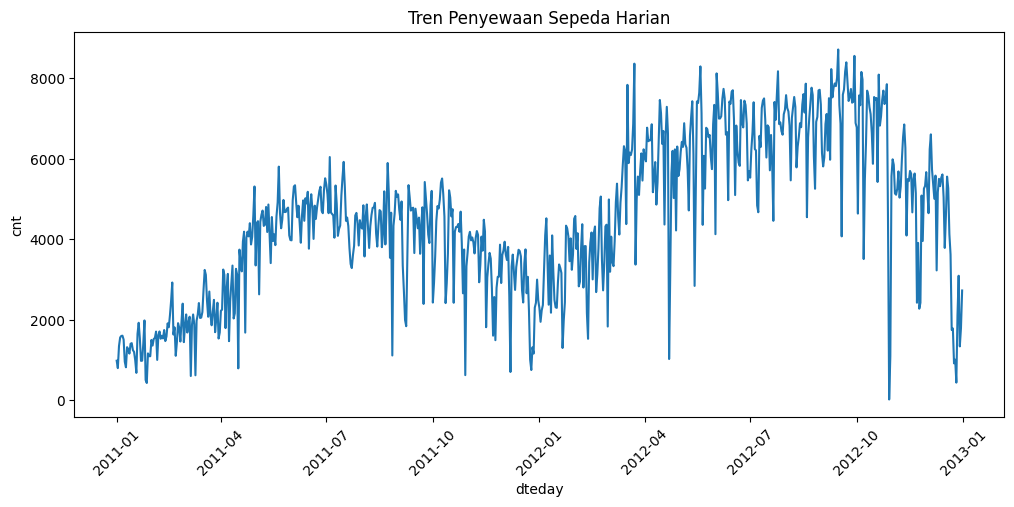

In [46]:
plt.figure(figsize=(12,5))
sns.lineplot(data=daily_df, x="dteday", y="cnt")
plt.title('Tren Penyewaan Sepeda Harian')
plt.xticks(rotation=45)
plt.show()

**Insight**
- Grafik ini menunjukkan tren penyewaan sepeda harian selama periode tertentu.
- Terlihat adanya pola musiman dengan puncak jumlah penyewaan yang lebih tinggi pada bulan-bulan tertentu.
- Ada tren peningkatan jumlah penyewaan di tahun kedua (2012).

### Pengaruh Musim terhadap Penyewaan
Jumlah penyewaan per musim

In [47]:
daily_df['season'] = daily_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [48]:
# total penyewaan dikelompokkan berdasarkan musim
daily_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Spring,60622,410726,471348


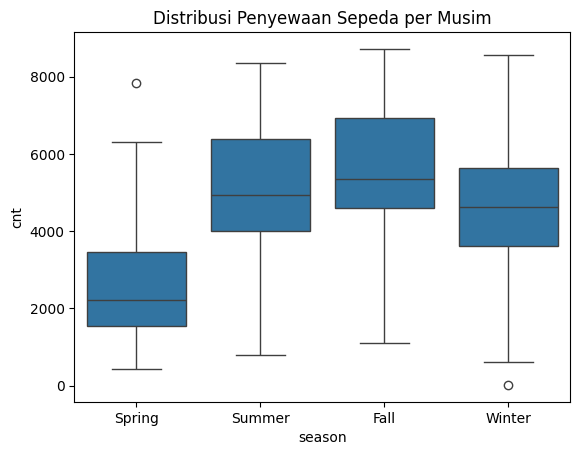

In [49]:
sns.boxplot(data=daily_df, x='season', y='cnt')
plt.title('Distribusi Penyewaan Sepeda per Musim')
plt.show()

**Insight**
- Spring (Musim Semi) memiliki jumlah penyewaan yang relatif lebih rendah dibandingkan musim lainnya.
- Summer (Musim Panas) dan Fall (Musim Gugur) memiliki jumlah penyewaan tertinggi dan distribusi yang lebih lebar.
- Winter (Musim Dingin) mengalami penurunan penyewaan, tetapi masih lebih tinggi dibandingkan musim semi.
- Terdapat beberapa outlier pada musim Spring dan Winter, yang mungkin mencerminkan hari-hari dengan jumlah penyewaan ekstrem.

### Analisis Hari Kerja vs Akhir Pekan
Perbedaan penyewaan di hari kerja vs akhir pekan

In [50]:
daily_df.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


In [51]:
# total penyewaan pada hari libur
daily_df.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


In [52]:
daily_df['weekday'] = daily_df['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                              4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

In [53]:
# total penyewaan dikelompokkan berdasarkan hari
daily_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
weekday,,,
Saturday,78238,409552,487790
Friday,61460,423935,485395
Sunday,153852,323955,477807
Thursday,57319,415729,473048
Wednesday,57843,411266,469109
Tuesday,70784,384719,455503
Monday,140521,303506,444027


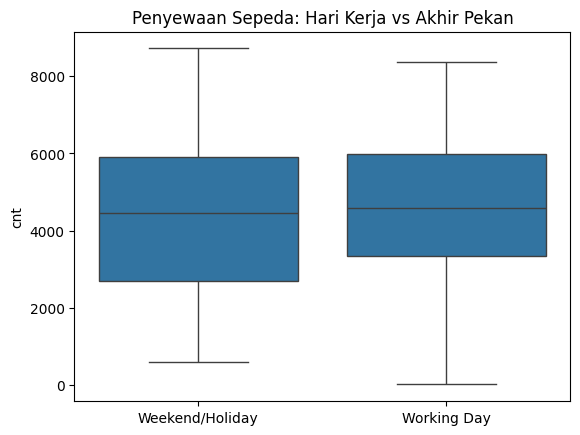

In [54]:
sns.boxplot(data=daily_df, x='workingday', y='cnt')
plt.xticks([0, 1], ['Weekend/Holiday', 'Working Day'])
plt.title('Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel("")
plt.show()

**Insight:**
- Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan atau hari libur.
- Top 3 jumlah penyewaan sepeda terbanyak dicapai pada hari Sabtu, Jumat, dan Minggu (akhir pekan), tetapi tetap lebih sedikit jika dibandingkan dengan jumlah keseluruhan pada hari kerja.
- Variasi jumlah penyewaan sepeda juga lebih besar pada hari kerja.

### Analisis Faktor Cuaca terhadap Penyewaan
Pengaruh cuaca terhadap jumlah penyewaan

In [55]:
daily_df['weathersit'] = daily_df['weathersit'].map({1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

In [56]:
# total penyewaan dikelompokkan berdasarkan cuaca
daily_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
weathersit,,,
Clear,446346,1811606,2257952
Mist/Cloudy,169776,827082,996858
Light Snow/Rain,3895,33974,37869


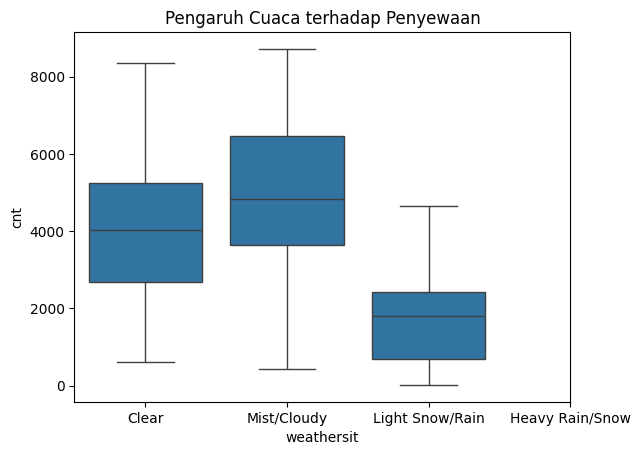

In [57]:
sns.boxplot(data=daily_df, x='weathersit', y='cnt')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.title('Pengaruh Cuaca terhadap Penyewaan')
plt.show()

**Insight:**
- Cuaca sangat mempengaruhi jumlah penyewaan sepeda.
- Cuaca "Mist/Cloudy" dan "Clear" cenderung memiliki jumlah penyewaan lebih tinggi dibandingkan cuaca "Light Snow/Rain" atau "Heavy Rain/Snow".
- Variasi jumlah penyewaan juga lebih besar pada cuaca "Clear" dan "Mist/Cloudy".

In [58]:
daily_df['weekday'] = daily_df['weekday'].map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
                                              'Friday': 4, 'Saturday': 5, 'Sunday': 6})
daily_df['season'] = daily_df['season'].map({'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4})
daily_df['weathersit'] = daily_df['weathersit'].map({'Clear': 1, 'Mist/Cloudy': 2, 'Light Snow/Rain': 3, 'Heavy Rain/Snow': 4})

### Hubungan Antara Variabel Numerik
Melihat korelasi antar variabel

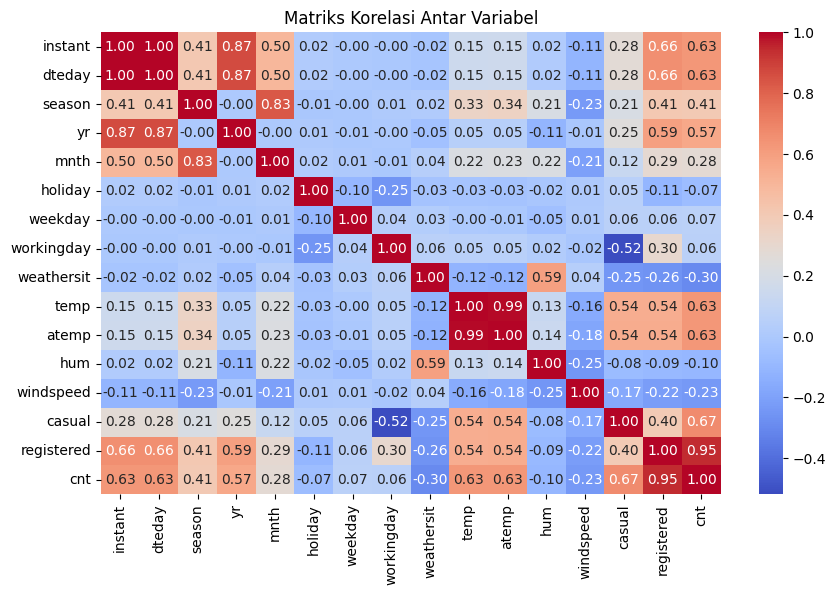

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(daily_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

**Insight:**
- Suhu (temp) memiliki korelasi positif dengan jumlah penyewaan, sedangkan kelembaban (hum) dan kecepatan angin (windspeed) memiliki dampak negatif.
- Variabel-variabel seperti `instant`, `dteday`, `yr`, `temp`, `atemp`, `casual`, dan `registered` memiliki korelasi yang kuat dengan `cnt`. Ini menunjukkan bahwa variabel-variabel ini memiliki pengaruh besar pada jumlah sepeda yang disewa.
- Variabel-variabel lain seperti `season`, `mnth`, dan `weathersit` memiliki korelasi sedang dengan `cnt`. Ini menunjukkan bahwa variabel-variabel ini juga mempengaruhi jumlah penyewaan, tetapi tidak sekuat variabel-variabel lainnya.
- Variabel-variabel seperti `holiday`, `weekday`, `workingday`, `hum`, dan `windspeed` memiliki korelasi lemah dengan `cnt`. Pengaruh variabel-variabel ini pada jumlah penyewaan mungkin tidak signifikan.

### Explore `hourly_df`

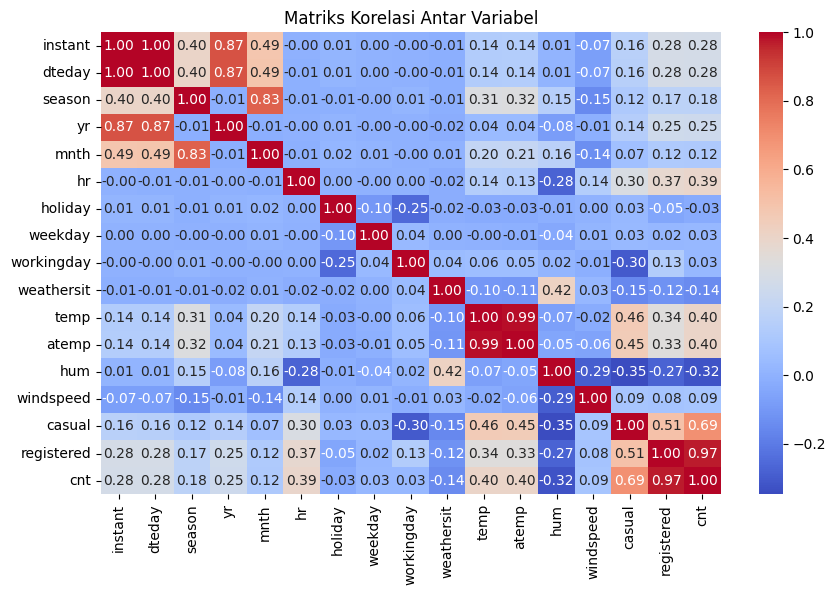

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(hourly_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

In [61]:
# total penyewaan dikelompokkan berdasarkan jam
hourly_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


**Insight:**
- Jumlah penyewaan sepeda tertinggi dicapai saat sore dan pagi hari, yaitu pada waktu commuting (jam berangkat dan pulang kerja/sekolah)

In [77]:
# total penyewaan dikelompokkan berdasarkan tanggal
hourly_df.groupby(by="dteday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
dteday,,,
2011-01-01,331,654,985
2011-01-02,131,670,801
2011-01-03,120,1229,1349
2011-01-04,108,1454,1562
2011-01-05,82,1518,1600
...,...,...,...
2012-12-27,247,1867,2114
2012-12-28,644,2451,3095
2012-12-29,159,1182,1341


<ipython-input-62-a5647cb70270>:20: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='time_category', y='cnt', data=time_rentals, palette=colors, hue='time_category', legend=False)


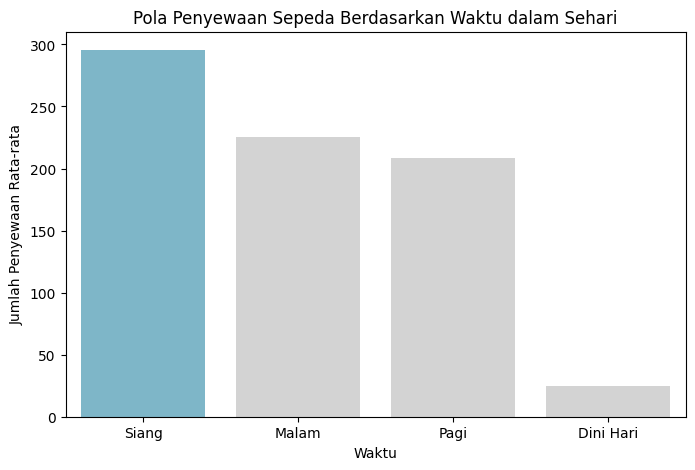

In [62]:
# Buat kategori waktu
def time_of_day(hour):
    if 0 <= hour < 6:
        return 'Dini Hari'
    elif 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    else:
        return 'Malam'

hourly_df['time_category'] = hourly_df['hr'].apply(time_of_day)

# Hitung jumlah penyewaan per kategori waktu
time_rentals = hourly_df.groupby('time_category')['cnt'].mean().reset_index().sort_values(by='cnt', ascending=False).copy()

# Visualisasi
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(8, 5))
sns.barplot(x='time_category', y='cnt', data=time_rentals, palette=colors, hue='time_category', legend=False)
plt.title('Pola Penyewaan Sepeda Berdasarkan Waktu dalam Sehari')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Penyewaan Rata-rata')
plt.show()


**Insight:**
- Jumlah rata-rata sepeda yang disewa mencapai puncaknya pada siang hari. Ini mengindikasikan bahwa siang hari adalah waktu paling populer bagi orang-orang untuk menggunakan sepeda sewaan.
- Jumlah penyewaan sepeda menurun secara signifikan pada malam dan dini hari. Hal ini wajar, karena pada waktu-waktu tersebut orang cenderung beristirahat atau tidak beraktivitas di luar rumah.
- Meskipun tidak setinggi siang hari, pagi hari juga menunjukkan jumlah penyewaan yang cukup tinggi. Ini mungkin karena orang-orang menggunakan sepeda untuk berangkat kerja atau berolahraga di pagi hari.

## Explore All Data

## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor apa yang paling mempengaruhi jumlah penyewaan sepeda?

<Figure size 1000x600 with 0 Axes>

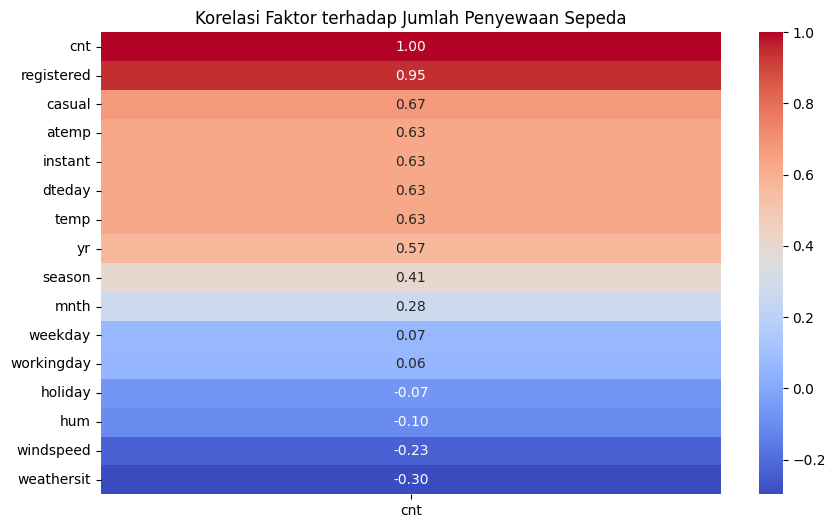

In [68]:
plt.figure(figsize=(10,6))

# Hitung korelasi
correlation_matrix = daily_df.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['cnt']].sort_values(by='cnt', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Faktor terhadap Jumlah Penyewaan Sepeda')
plt.show()

<Figure size 1000x600 with 0 Axes>

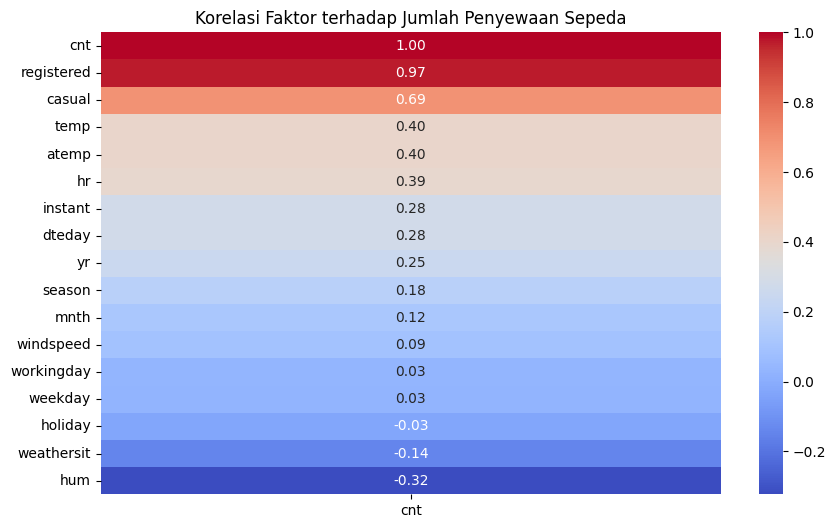

In [69]:
plt.figure(figsize=(10,6))

# Hitung korelasi
hourly_df_copy = hourly_df.copy()

# Hapus kolom 'time_category'
hourly_df_copy.drop('time_category', axis=1, inplace=True)

# Visualisasi dengan heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = hourly_df_copy.corr()

sns.heatmap(correlation_matrix[['cnt']].sort_values(by='cnt', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Faktor terhadap Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 2: Bagaimana Pola Penyewaan Sepeda pada Musim yang Berbeda?

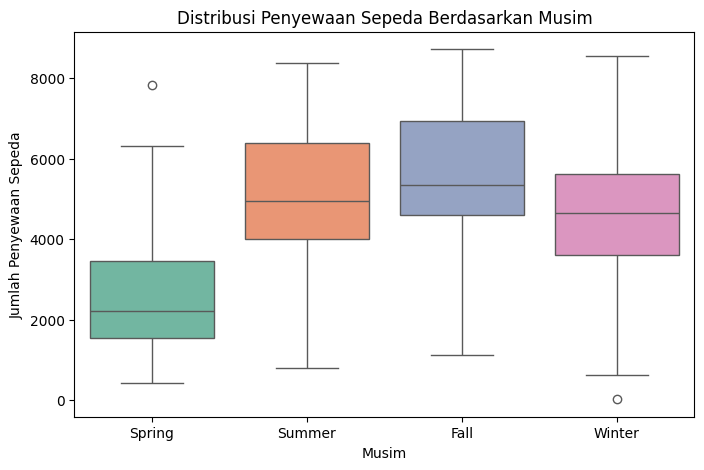

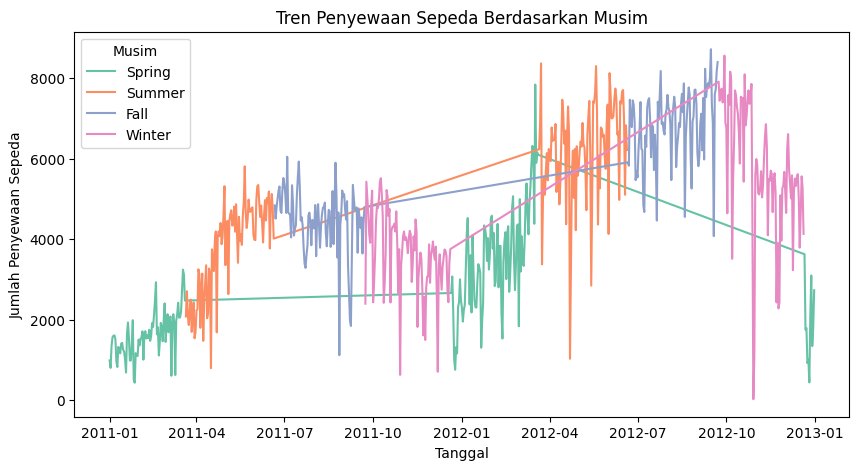

In [70]:
# Boxplot distribusi penyewaan berdasarkan musim
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=daily_df, palette='Set2', hue='season', legend=False)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])  # Label musim
plt.show()

# Lineplot tren penyewaan sepanjang musim
plt.figure(figsize=(10, 5))
sns.lineplot(x='dteday', y='cnt', hue='season', data=daily_df, palette='Set2')
plt.title('Tren Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Spring', 'Summer', 'Fall', 'Winter'], title='Musim')

plt.show()

**Insight:**
- Berdasarkan kedua grafik di atas, menunjukkan bahwa musim memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda.
- Variasi dalam jumlah penyewaan juga lebih besar pada musim panas dan gugur. Ini mungkin karena pada musim-musim tersebut, orang lebih sering bersepeda untuk rekreasi atau aktivitas lainnya, sehingga faktor-faktor eksternal seperti cuaca atau acara khusus dapat lebih mempengaruhi jumlah penyewaan.
- Terdapat tren positif dalam jumlah penyewaan sepeda dari tahun ke tahun. Ini mengindikasikan bahwa bersepeda semakin populer sebagai moda transportasi atau aktivitas rekreasi.
- Faktor-faktor Lain: Fluktuasi harian dalam jumlah penyewaan menunjukkan bahwa ada faktor-faktor lain selain musim yang juga mempengaruhi, seperti cuaca, hari libur, atau acara khusus.

### Pertanyaan 3: Bagaimana perilaku penyewaan berbeda antara pengguna kasual dan terdaftar?

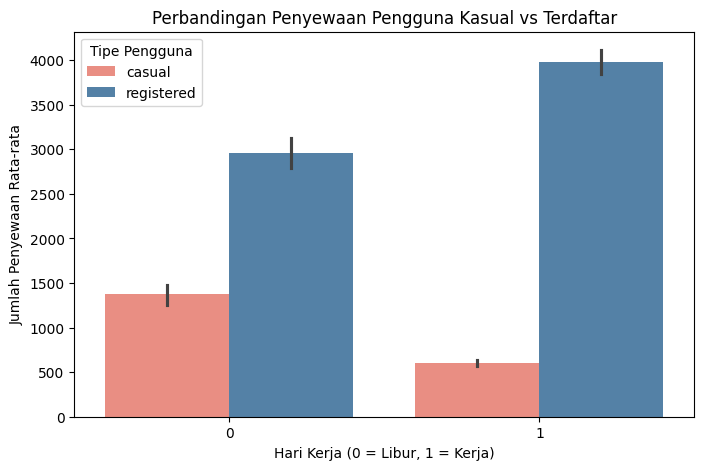

In [71]:
df_melted = daily_df[['workingday', 'casual', 'registered']].melt(id_vars=['workingday'],
                                                                  var_name='User Type',
                                                                  value_name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(x='workingday', y='Count', hue='User Type', data=df_melted, palette=['salmon', 'steelblue'])

plt.title('Perbandingan Penyewaan Pengguna Kasual vs Terdaftar')
plt.xlabel('Hari Kerja (0 = Libur, 1 = Kerja)')
plt.ylabel('Jumlah Penyewaan Rata-rata')

plt.legend(title='Tipe Pengguna')
plt.show()

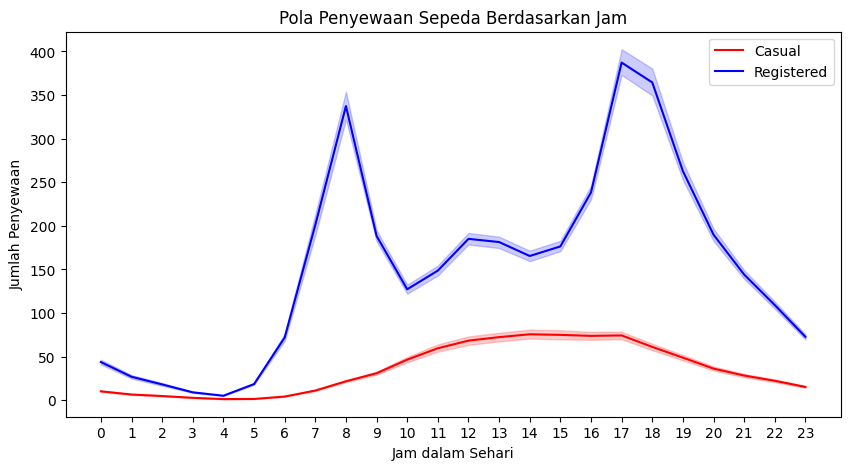

In [72]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='casual', data=hourly_df, label='Casual', color='red')
sns.lineplot(x='hr', y='registered', data=hourly_df, label='Registered', color='blue')
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.xticks(range(0, 24))
plt.show()

**Insight:**
- Pengguna terdaftar menunjukkan peningkatan tajam pada jam-jam sibuk, terutama pada pagi hari (sekitar jam 8) dan sore hari (sekitar jam 17-18). Pola ini mengindikasikan bahwa pengguna terdaftar mungkin menggunakan sepeda untuk berpergian atau perjalanan rutin ke tempat kerja atau sekolah.
- Pengguna kasual menunjukkan peningkatan jumlah penyewaan pada siang hari (sekitar jam 12 hingga 16). Pola ini mengindikasikan bahwa pengguna kasual mungkin menggunakan sepeda untuk rekreasi atau aktivitas santai di siang hari.

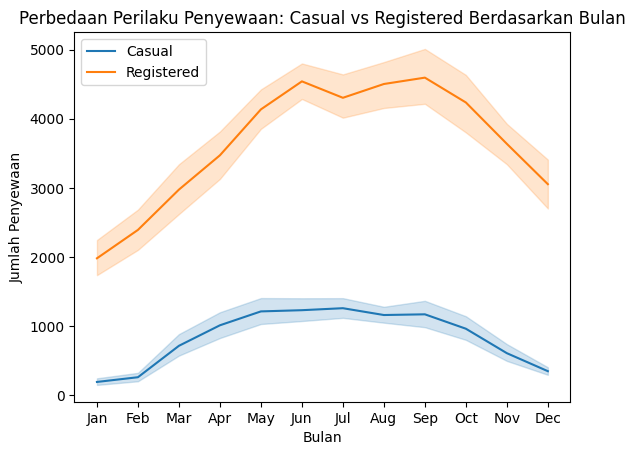

In [73]:
sns.lineplot(data=daily_df, x="mnth", y="casual", label="Casual")
sns.lineplot(data=daily_df, x="mnth", y="registered", label="Registered")
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Perbedaan Perilaku Penyewaan: Casual vs Registered Berdasarkan Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Bulan')
plt.legend()
plt.show()

<Figure size 800x500 with 0 Axes>

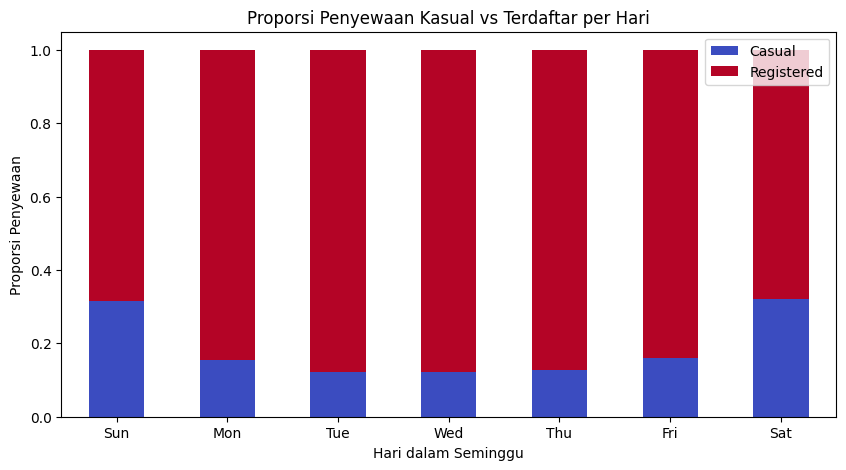

In [74]:
weekly_rentals = daily_df.groupby('weekday')[['casual', 'registered']].sum()
weekly_rentals['total'] = weekly_rentals['casual'] + weekly_rentals['registered']
weekly_rentals['casual_ratio'] = weekly_rentals['casual'] / weekly_rentals['total']
weekly_rentals['registered_ratio'] = weekly_rentals['registered'] / weekly_rentals['total']

plt.figure(figsize=(8, 5))
weekly_rentals[['casual_ratio', 'registered_ratio']].plot(kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm')
plt.title('Proporsi Penyewaan Kasual vs Terdaftar per Hari')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Proporsi Penyewaan')
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation=0)
plt.legend(['Casual', 'Registered'])
plt.show()

**Insight**
- Pengguna kasual lebih dominan di Sabtu dan Minggu, kemungkinan mereka cenderung bersepeda untuk rekreasi.
- Pengguna terdaftar lebih banyak di hari Senin-Jumat, mereka mungkin menggunakan sepeda untuk transportasi sehari-hari.

## Conclusion

- Faktor yang paling mempengaruhi jumlah penyewaan sepeda adalah faktor suhu (atemp/temp) yang menunjukkan korelasi paling tinggi. Kemudian diikuti dengan variabel jam, yang menunjukkan waktu berangkat/pulang kerja/sekolah memiliki jumlah penyewaan tertinggi. Selain itu, terdapat variabel musim (season)yang menunjukkan bahwa berarti cuaca panas berhubungan dengan peningkatan penyewaan sepeda yang sejalan dengan kondisi pada musim panas yang memiliki jumlah penyewaan sepeda tertinggi kedua.
- Musim panas dan gugur cenderung memiliki jumlah penyewaan lebih tinggi dibandingkan musim semi dan dingin. Berarti orang lebih cenderung bersepeda pada saat cuaca lebih hangat.
- Jumlah penyewaan sepeda oleh pengguna terdaftar (registered) lebih tinggi secara signifikan dibandingkan pengguna kasual (casual), baik pada hari kerja maupun hari libur. Ini menunjukkan bahwa layanan penyewaan sepeda lebih penting bagi mereka yang menjadikannya bagian dari mobilitas rutin.
- Waktu (jam dalam sehari dan bulan dalam setahun) memiliki pengaruh signifikan terhadap pola penyewaan sepeda.
  - Jam Sibuk: Pengguna terdaftar cenderung menggunakan sepeda pada jam-jam sibuk commuter (pagi dan sore hari), sementara pengguna kasual lebih banyak pada siang hari untuk rekreasi.
  - Kedua jenis pengguna menunjukkan peningkatan penyewaan pada musim panas, tetapi pengguna kasual lebih responsif terhadap faktor-faktor musiman dengan peningkatan yang lebih tajam.
- Pengguna terdaftar memiliki pola penyewaan yang lebih konsisten dan dapat diprediksi, sementara pengguna kasual lebih fluktuatif dan mungkin dipengaruhi oleh faktor-faktor eksternal seperti cuaca, acara, atau hari libur.

In [78]:
hourly_df.to_csv("final_data.csv", index=False)